In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "training_linear_models"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

# Linear regression using the normal equations

In [2]:
import numpy as np

X= 2*np.random.rand(100,1)
y = 4+3*X + np.random.randn(100,1)

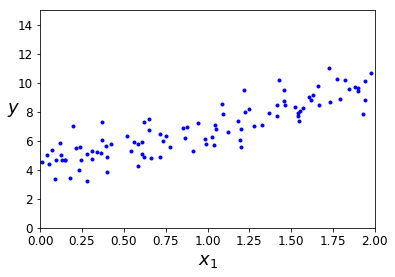

In [3]:
plt.plot(X,y,"b.")
plt.xlabel("$x_1$",fontsize=18)
plt.ylabel("$y$",rotation=0,fontsize=18)
plt.axis([0,2,0,15])
plt.show()

In [5]:
X_b = np.c_[np.ones((100,1)),X] # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [6]:
theta_best

array([[4.21509616],
       [2.77011339]])

# Predictions with theta

In [8]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)),X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.21509616],
       [9.75532293]])

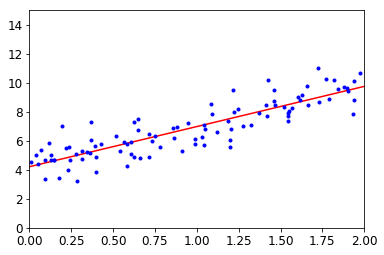

In [9]:
plt.plot(X_new,y_predict,"r-")
plt.plot(X,y,"b.")
plt.axis([0,2,0,15])
plt.show()

In [10]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_,lin_reg.coef_


(array([4.21509616]), array([[2.77011339]]))

In [11]:
lin_reg.predict(X_new)

array([[4.21509616],
       [9.75532293]])

# Computational Complexity

In [13]:
theta_best_svd , residuals , rank , s= np.linalg.lstsq(X_b,y,rcond=1e-6)
theta_best_svd

array([[4.21509616],
       [2.77011339]])

# Gradient  Descent

In [14]:
eta = 0.1
n_iterations = 1000
m=100
theta = np.random.randn(2,1)

for iteration in range(n_iterations):
    gradients = 2/m*X_b.T.dot(X_b.dot(theta)-y)
    theta = theta - eta*gradients

theta

array([[4.21509616],
       [2.77011339]])

# Stochastic Gradient Descent

In [16]:
n_epochs = 50
t0,t1 = 5,50

def learning_schedule(t):
    return t0/(t+t1)

theta = np.random.randn(2,1)

for epoch in range(n_epochs):
    for i in range(m):
        random_index =np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2*xi.T.dot(xi.dot(theta)-yi)
        eta= learning_schedule(epoch*m+i)
        theta = theta -eta*gradients

In [17]:
theta

array([[4.18228368],
       [2.72737073]])

In [19]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(n_iter=50 , penalty = None , eta0=0.1)
sgd_reg.fit(X,y.ravel())


SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.1,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', n_iter=50, penalty=None, power_t=0.25,
       random_state=None, shuffle=True, verbose=0, warm_start=False)

In [21]:
sgd_reg.intercept_,sgd_reg.coef_

(array([4.25873097]), array([2.81460429]))

# Mini-batch Gradient Descent

# Polynomial regression

In [27]:
import numpy as np
import numpy.random as rnd

np.random.seed(42)

In [30]:
m=100
X=6*np.random.rand(m,1)-3
y= 0.5*X**2+X+2+np.random.randn(m,1)

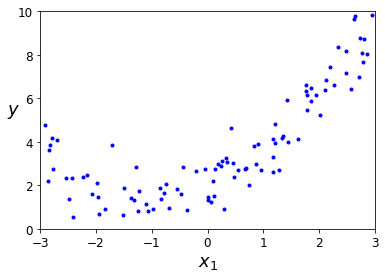

In [31]:
plt.plot(X,y,"b.")
plt.xlabel("$x_1$",fontsize=18)
plt.ylabel("$y$",rotation=0,fontsize=18)
plt.axis([-3,3,0,10])
plt.show()

In [32]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2,include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([1.76886782])

In [33]:
X_poly[0]

array([1.76886782, 3.12889337])

In [34]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly,y)
lin_reg.intercept_,lin_reg.coef_

(array([1.99958228]), array([[1.04630034, 0.5015459 ]]))

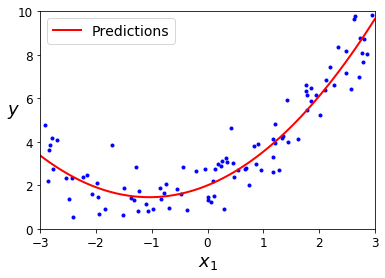

In [41]:
X_new=np.linspace(-3,3,100).reshape(100,1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X,y,"b.")
plt.plot(X_new,y_new,"r-",linewidth=2,label="Predictions")
plt.xlabel("$x_1$",fontsize=18)
plt.ylabel(  "$y$"  , rotation=0,fontsize=18)
plt.legend(loc="upper left",fontsize=14)
plt.axis([-3,3,0,10])
plt.show()

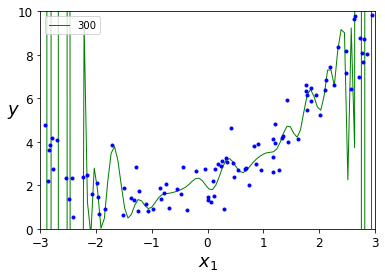

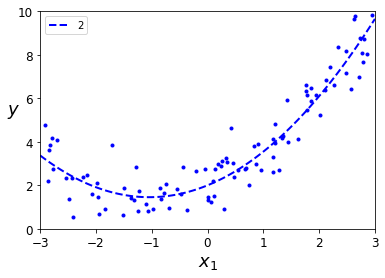

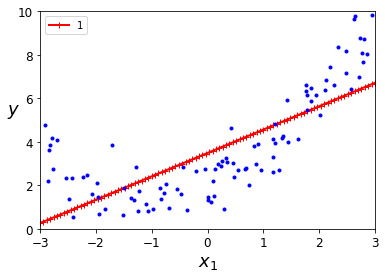

In [44]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

for style , width ,degree in ((("g-",1,300)),("b--",2,2),("r-+",2,1)):
    polybig_features = PolynomialFeatures(degree=degree , include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features",polybig_features),
            ("std_scaler",std_scaler),
            ("lin_reg",lin_reg),
        ])
    
    polynomial_regression.fit(X,y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new,y_newbig,style,label=str(degree),linewidth=width)
    
    plt.plot(X,y,"b.",linewidth=3)
    plt.legend(loc="upper left")
    plt.xlabel("$x_1$",fontsize=18)
    plt.ylabel("$y$",rotation=0,fontsize=18)
    plt.axis([-3,3,0,10])
    plt.show()

In [52]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model,X,y):
    X_train , X_val , y_train , y_val = train_test_split(X,y,test_size=0.2)
    train_errors , val_errors = [],[]
    for m in range(1,len(X_train)):
          model.fit(X_train[:m],y_train[:m])
          y_train_predict = model.predict(X_train[:m])
          y_val_predict = model.predict(X_val)
          train_errors.append(mean_squared_error(y_train_predict,y_train[:m]))
          val_errors.append(mean_squared_error(y_val_predict,y_val))
    
    
    plt.plot ( np.sqrt(train_errors),"r-+",linewidth=2,label="train")
    plt.plot(np.sqrt(val_errors),"b-",linewidth=3,label="val")
    plt.legend(loc="upper right",fontsize=14)
    plt.ylabel("RMSE",fontsize=14)
    

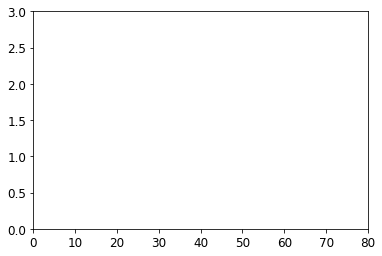

In [53]:
lin_reg = LinearRegression()
plot_learning_curves = (lin_reg , X , y)
plt.axis([0,80,0,3])
plt.show()

In [54]:
# not working :()



polynomial_regression = Pipeline ([
        ("poly_features",PolynomialFeatures(degree=10,include_bias=False))
        ("lin_reg",LinearRegression()),
        ])

plot_learning_curves(polynomial_regression,X,y)

# Regularized Linear Models 

In [59]:
# Ridge regression

from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1,solver="cholesky",random_state=42)
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])


array([[5.09566904]])

In [62]:
sgd_reg = SGDRegressor(penalty="l2",random_state=42)
sgd_reg.fit(X,y.ravel())
sgd_reg.predict([[1.5]])

array([4.34978611])

In [63]:
ridge_reg = Ridge(alpha=1 , solver="sag",random_state=42)
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])

array([[5.0802376]])

In [65]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X,y)
lasso_reg.predict([[1.5]])

array([5.05540313])

In [66]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5,random_state=42)
elastic_net.fit(X,y)
elastic_net.predict([[1.5]])

array([5.05450293])

# Early stopping


In [75]:
from sklearn.base import clone
sgd_reg = SGDRegressor(n_iter=1 , warm_start=True,penalty=None,
                      learning_rate="constant",eta0=0.00005,random_state=42)

np.random.seed(42)
m=100
X=6*np.random.rand(m,1)-3
y= 2+X+0.5*X**2+np.random.randn(m,1)

X_train,X_val,y_train,y_val = train_test_split(X[:50],y[:50].ravel(),tes_size=0.5,include_bias=False)

poly_scaler = Pipeline([
        ("poly_features",PolynomialFeatures(degree=90,include_bias=False)),
        ("std_scaler",StandardScaler()),
    ])



X_train_poly_scaled = poly_scaler.fit_transform(X_train)
minimim_val_error= float("inf")
best_epoch=None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled,y_train)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val,y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error=val_error
        best_epoch = epoch
        best_model=clone(sgd_reg)

TypeError: Invalid parameters passed: {'include_bias': False, 'tes_size': 0.5}

In [76]:
# messed up that line of code

# Decision Boundaries

In [77]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['DESCR', 'feature_names', 'target_names', 'data', 'target']

In [78]:
print(iris.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [79]:
['data','target_names','feature_names','target','DESCR']
X=iris["data"][:,3:]
y = (iris["target"]==2).astype(np.int)

In [80]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X,y)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

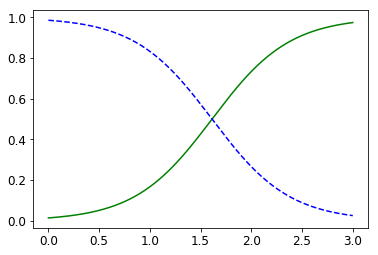

In [81]:
X_new = np.linspace(0,3,1000).reshape(-1,1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new,y_proba[:,1],"g-",label="Iris_virginica")
plt.plot(X_new,y_proba[:,0],"b--",label="Not Iris_virginica")

In [83]:
log_reg.predict([[1.7],[1.5]])


array([1, 0])

In [87]:
X = iris["data"][:,(2,3)]
y=iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs",C=10)
softmax_reg.fit(X,y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [88]:
softmax_reg.predict([[5,2]])


array([2])

In [90]:
softmax_reg.predict_proba([[5,2]])

array([[6.33134077e-07, 5.75276067e-02, 9.42471760e-01]])